In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline
from IPython.display import display, HTML

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)
sp.__version__

'1.1.2.dev'

In [3]:
rho_steel = ml.PQ(7.8*u.g/u.cm**3, is_const=True)
rho_glass = ml.PQ(2.5*u.g/u.cm**3, is_const=True)
g = ml.PQ(9.816*u.m/u.s**2, is_const=True)
S = ml.PQ(10*u.cm, sigma=0.1*u.cm)

In [39]:
data = pd.read_csv('lab2.2.6.csv')
#data = (data[:6])
data['d'] = data.apply(lambda row: ml.PQ(row['d']*u.mm, sigma=0.05*u.mm), axis=1)
data['t_fall_2_1'] = data['t_fall_2_1']-data['t_fall_1_1']
data['t_fall_2_2'] = data['t_fall_2_2']-data['t_fall_1_2']
data['t_fall'] = data.apply(lambda row: ml.PQ(
    (row['t_fall_1_1']+row['t_fall_1_2']
     +(row['t_fall_2_1'])
     +(row['t_fall_2_2']))/4*u.s, sigma=0.01*u.s), axis=1)
#data['t_fall'] = data.apply(lambda row: ml.PQ(row['t_fall']*0.05*u.s, sigma=0.1*u.s), axis=1)

data['T'] = data.apply(lambda row: ml.PQ(ml.celsium_to_kelvins(row['T']), sigma=0.1*u.kelvins), axis=1)
data['rho_fluid'] = data.apply(lambda row: ml.PQ(row['rho_fluid']*u.g/u.cm**3, sigma=0.01*u.g/u.cm**3), axis=1)

data['r'] = data['d']/2
data['rho_ball'] = data.apply(lambda row: rho_steel if row['material'] == 'сталь' else rho_glass, axis=1)
data['v_уст'] = data.apply(lambda row: S/row['t_fall'], axis=1)

data['eta'] = ml.pqarray(2/9*data['r']**2*g*(data['rho_ball']-data['rho_fluid'])/data['v_уст']).repr_as(u.pa*u.s)
data['Re'] = ml.pqarray(data['v_уст']*data['r']*data['rho_fluid']/data['eta']).repr_as(1)

In [40]:
data['tau'] = ml.pqarray(2/9*data['r']**2*data['rho_ball']/data['eta']).repr_as(u.s)
# Имеем t >> tau
data['S'] = ml.pqarray(data['v_уст']*data['tau'])


In [41]:
ml.pqarray(2/9*data['r']**2*g*(data['rho_ball']-data['rho_fluid'])/data['v_уст']).repr_as(u.m**2*u.m/u.s**2*u.kg/u.m**3/u.m*u.s)

pqarray([0.48±0.03 kilogram/(meter*second) (6.9%),
         0.45±0.03 kilogram/(meter*second) (6.9%),
         0.47±0.03 kilogram/(meter*second) (6.9%),
         0.247±0.017 kilogram/(meter*second) (6.9%),
         0.181±0.012 kilogram/(meter*second) (6.9%),
         0.098±0.007 kilogram/(meter*second) (6.9%),
         0.065±0.004 kilogram/(meter*second) (6.9%),
         0.45±0.09 kilogram/(meter*second) (20%),
         0.50±0.12 kilogram/(meter*second) (24%),
         0.59±0.11 kilogram/(meter*second) (18%),
         0.24±0.04 kilogram/(meter*second) (17%),
         0.17±0.03 kilogram/(meter*second) (20%),
         0.083±0.014 kilogram/(meter*second) (17%),
         0.060±0.009 kilogram/(meter*second) (16%)], dtype=object)

In [42]:
data

,material,d,t_fall_1_1,t_fall_1_2,t_fall_2_1,t_fall_2_2,T,rho_fluid,t_fall,r,rho_ball,v_уст,eta,Re,tau,S
0,стекло,2.10±0.05 millimeter (2.4%),15.68,15.74,16.10,16.48,294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),16.000±0.010 second (0.062%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,0.625±0.006 centimeter/second (1.0%),0.48±0.03 pascal*second (6.9%),0.0173±0.0013 (7.4%),(12.80±1.20)*10^-4 second (9.6%),(8.0±0.8)*10^-4 centimeter (9.7%)
1,стекло,2.10±0.05 millimeter (2.4%),15.24,14.99,15.26,15.54,294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),15.258±0.010 second (0.066%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,0.655±0.007 centimeter/second (1.0%),0.45±0.03 pascal*second (6.9%),0.0191±0.0014 (7.4%),(13.50±1.30)*10^-4 second (9.6%),(8.8±0.9)*10^-4 centimeter (9.7%)
2,стекло,2.10±0.05 millimeter (2.4%),15.84,15.84,15.63,15.79,294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),15.775±0.010 second (0.063%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,0.634±0.006 centimeter/second (1.0%),0.47±0.03 pascal*second (6.9%),0.0178±0.0013 (7.4%),(13.00±1.30)*10^-4 second (9.6%),(8.3±0.8)*10^-4 centimeter (9.7%)
3,стекло,2.10±0.05 millimeter (2.4%),8.24,8.15,8.17,8.41,303.35±0.10 kelvin (0.033%),1.256±0.010 gram/centimeter**3 (0.80%),8.242±0.010 second (0.12%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,1.213±0.012 centimeter/second (1.0%),0.247±0.017 pascal*second (6.9%),0.065±0.005 (7.4%),(24.80±2.40)*10^-4 second (9.6%),(30.10±2.90)*10^-4 centimeter (9.7%)
4,стекло,2.10±0.05 millimeter (2.4%),5.83,5.86,6.23,6.17,313.25±0.10 kelvin (0.032%),1.251±0.010 gram/centimeter**3 (0.80%),6.022±0.010 second (0.17%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,1.660±0.017 centimeter/second (1.0%),0.181±0.012 pascal*second (6.9%),0.121±0.009 (7.4%),(3.4±0.3)*10^-3 second (9.6%),(5.6±0.5)*10^-3 centimeter (9.7%)
5,стекло,2.10±0.05 millimeter (2.4%),3.11,3.15,3.39,3.38,323.15±0.10 kelvin (0.031%),1.250±0.010 gram/centimeter**3 (0.80%),3.258±0.010 second (0.31%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,3.07±0.03 centimeter/second (1.0%),0.098±0.007 pascal*second (6.9%),0.41±0.03 (7.4%),(6.3±0.6)*10^-3 second (9.6%),0.0192±0.0019 centimeter (9.7%)
6,стекло,2.10±0.05 millimeter (2.4%),2.05,2.14,2.20,2.20,333.15±0.10 kelvin (0.030%),1.245±0.010 gram/centimeter**3 (0.80%),2.148±0.010 second (0.47%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,4.66±0.05 centimeter/second (1.1%),0.065±0.004 pascal*second (6.9%),0.94±0.07 (7.4%),(9.4±0.9)*10^-3 second (9.6%),0.044±0.004 centimeter (9.7%)
7,сталь,0.70±0.05 millimeter (7.1%),25.77,25.74,26.11,26.33,294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),25.988±0.010 second (0.038%),0.350±0.025 millimeter (7.1%),7.800000 gram/centimeter**3,0.385±0.004 centimeter/second (1.0%),0.45±0.09 pascal*second (20%),(3.7±0.8)*10^-3 (21%),(4.70±1.30)*10^-4 second (29%),(1.8±0.5)*10^-4 centimeter (29%)
8,сталь,0.60±0.05 millimeter (8.3%),33.68,33.52,44.10,44.30,294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),38.900±0.010 second (0.026%),0.300±0.025 millimeter (8.3%),7.800000 gram/centimeter**3,0.2571±0.0026 centimeter/second (1.0%),0.50±0.12 pascal*second (24%),(1.9±0.5)*10^-3 (25%),(3.10±1.00)*10^-4 second (33%),(8.00±2.70)*10^-5 centimeter (33%)
9,сталь,0.80±0.05 millimeter (6.2%),25.67,25.73,26.30,26.39,294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),26.022±0.010 second (0.038%),0.400±0.025 millimeter (6.2%),7.800000 gram/centimeter**3,0.384±0.004 centimeter/second (1.0%),0.59±0.11 pascal*second (18%),(3.3±0.6)*10^-3 (19%),(4.70±1.20)*10^-4 second (25%),(1.8±0.4)*10^-4 centimeter (25%)


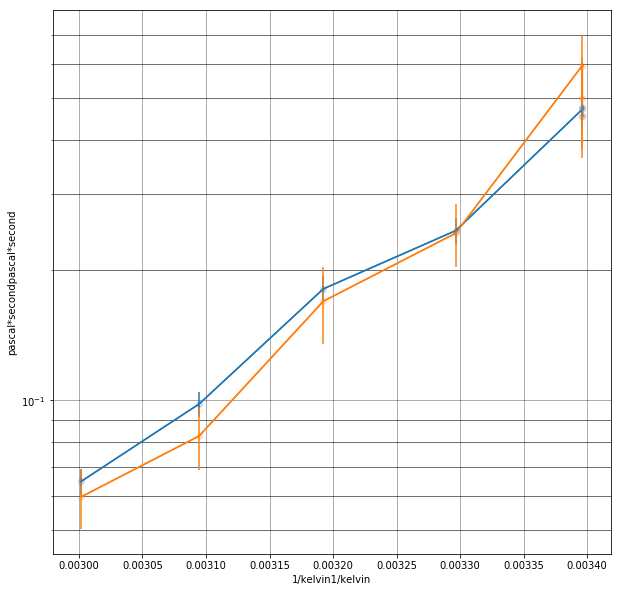

In [44]:
plt.figure(figsize=(10,10))
for material in data['material'].unique():
    #print(ml.pqarray(dat['t_fall']).val_float)
    dat = data[data['material']==material].sort_values(by='T')
    #display(dat)
    
    ml.plt_pq(1/ml.pqarray(dat['T']), ml.pqarray(dat['eta']), plot=plt.semilogy)
plt.show()